In [ ]:
#import required packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np

In [ ]:
#Data Preprocessing
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)
#Traning data
train_generator = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/FER_dataset/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')
#Testing data
validation_generator = validation_data_gen.flow_from_directory(
        '/content/drive/MyDrive/FER_dataset/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 3603 images belonging to 7 classes.
Found 3429 images belonging to 7 classes.


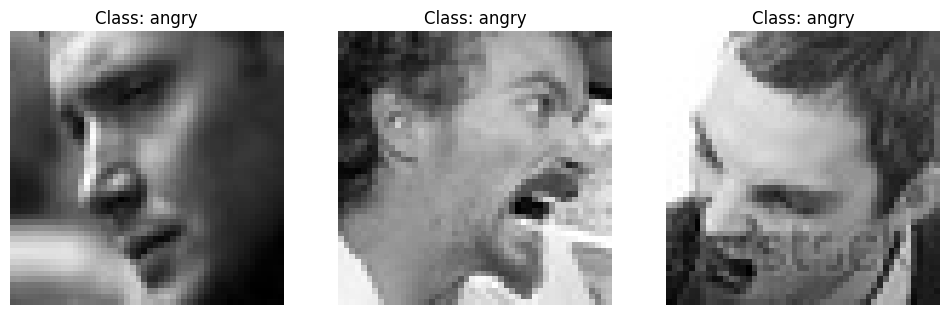

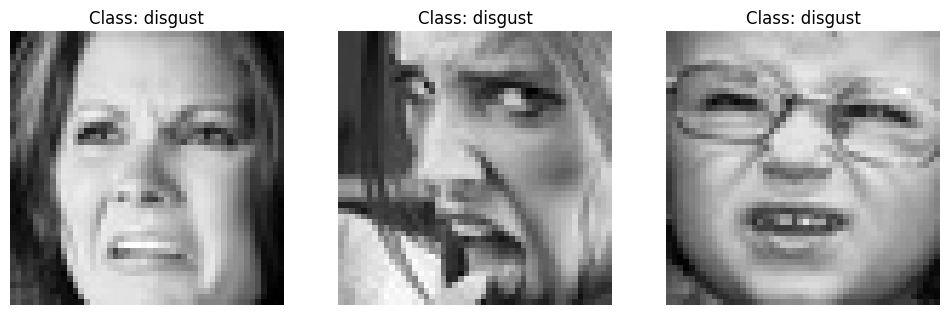

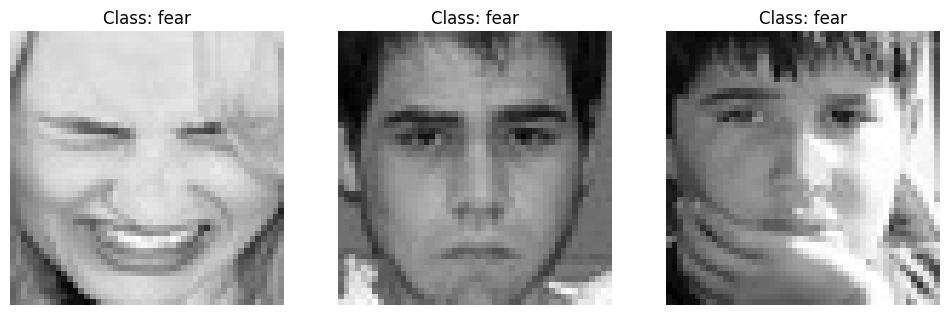

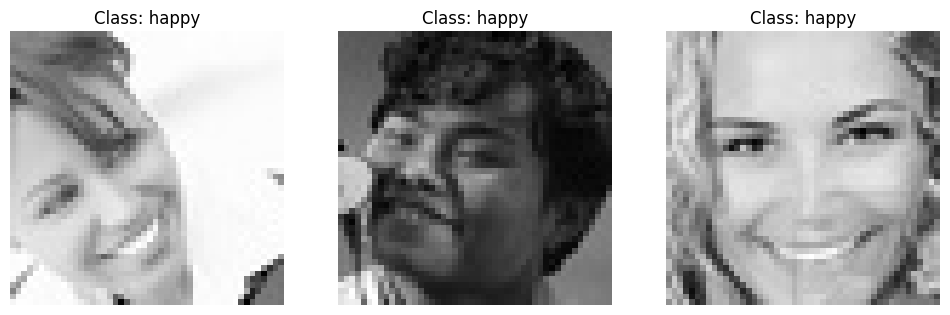

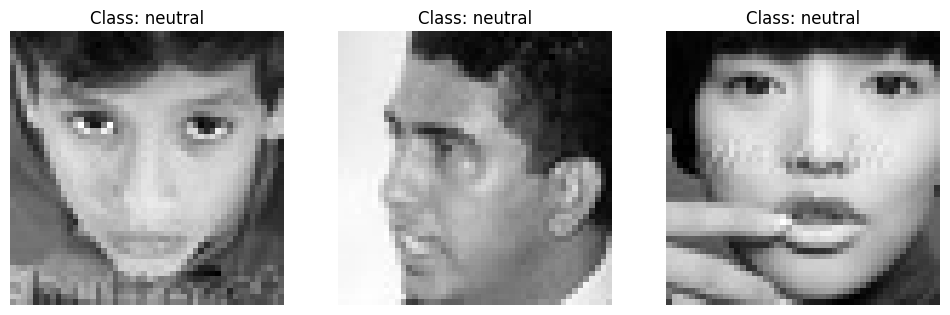

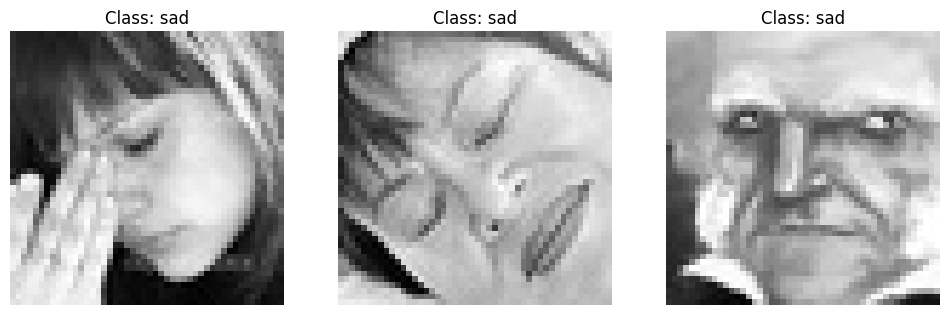

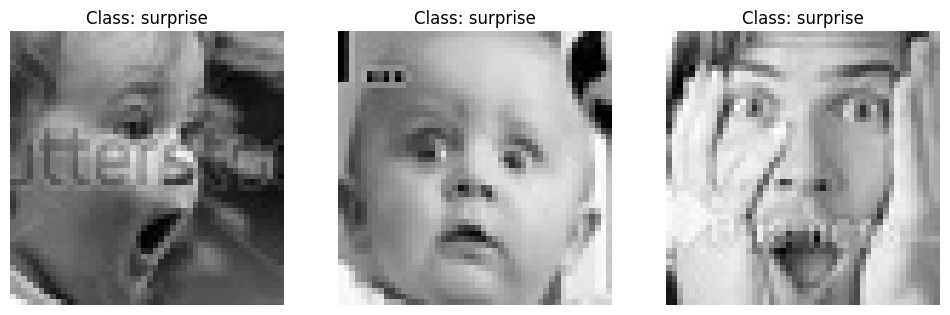

In [ ]:
#Display Preprocessed images
import os
import cv2
import matplotlib.pyplot as plt

# Directory containing test images
test_directory = '/content/drive/MyDrive/FER_dataset/test'

# Get a list of class names (assuming each subdirectory is a class)
class_names = sorted(os.listdir(test_directory))

# Set the number of images to display from each class
images_per_class = 3

# Load and display three images from each class in a row
for class_name in class_names:
    class_path = os.path.join(test_directory, class_name)

    # Get the list of image files in the class directory
    image_files = os.listdir(class_path)

    # Display three images in a row from each class
    fig, axes = plt.subplots(1, images_per_class, figsize=(12, 4))

    for i in range(min(images_per_class, len(image_files))):
        image_path = os.path.join(class_path, image_files[i])

        # Read and display the image using OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        axes[i].imshow(image,cmap='gray')
        axes[i].set_title(f'Class: {class_name}')
        axes[i].axis('off')

    plt.show()


In [ ]:
#Creating model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
						input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.summary()

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
							decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
					metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [ ]:
#Training model
emotion_model_info = emotion_model.fit_generator(
		train_generator,
		steps_per_epoch=3603 // 64,
		epochs=50,
		validation_data=validation_generator,
		validation_steps=3429 // 64)


<ipython-input-4-91c41d56d1c7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
56/56 [==============================] - 94s 2s/step - loss: 1.9438 - accuracy: 0.1557 - val_loss: 1.9347 - val_accuracy: 0.1604
Epoch 2/50
56/56 [==============================] - 93s 2s/step - loss: 1.9407 - accuracy: 0.1611 - val_loss: 1.9320 - val_accuracy: 0.1545
Epoch 3/50
56/56 [==============================] - 90s 2s/step - loss: 1.9350 - accuracy: 0.1769 - val_loss: 1.9290 - val_accuracy: 0.1751
Epoch 4/50
56/56 [==============================] - 91s 2s/step - loss: 1.9218 - accuracy: 0.1950 - val_loss: 1.9005 - val_accuracy: 0.2214
Epoch 5/50
56/56 [==============================] - 91s 2s/step - loss: 1.8987 - accuracy: 0.2119 - val_loss: 1.8632 - val_accuracy: 0.2471
Epoch 6/50
56/56 [==============================] - 91s 2s/step - loss: 1.8723 - accuracy: 0.2379 - val_loss: 1.8435 - val_accuracy: 0.2538
Epoch 7/50
56/56 [==============================] - 91s 2s/step - loss: 1.8384 - accuracy: 0.2585 - val_loss: 1.8082 - val_accuracy: 0.2836
Epoch 8/50
56/56 [==

In [ ]:
#Loading model and weights
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
	json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')


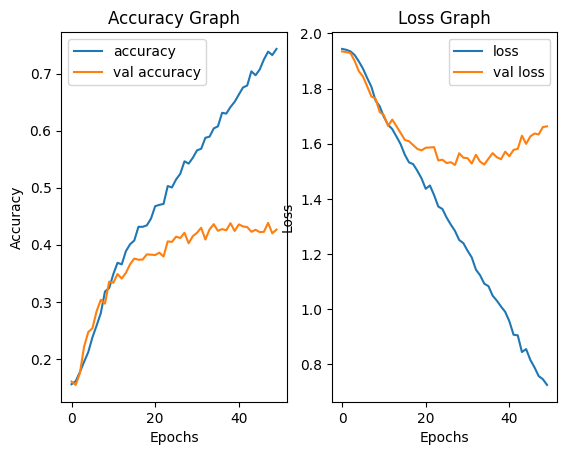

In [ ]:
#Plot of accuracy vs epoch
import matplotlib.pyplot as plt
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
#Accuracy vs epoch table
import pandas as pd

# Assuming you have the 'emotion_model_info' object containing accuracy and validation accuracy
# Replace this with your actual data
history_data = emotion_model_info.history

# Create a DataFrame
history_df = pd.DataFrame(history_data)

# Filter the DataFrame for every 10th epoch
interval = 5
filtered_history_df = history_df[::interval]

# Display the table
print(filtered_history_df[['accuracy', 'val_accuracy']])


    accuracy  val_accuracy
0   0.155694      0.160377
5   0.237920      0.253833
10  0.348686      0.333432
15  0.407460      0.375884
20  0.467646      0.382075
25  0.514509      0.414210
30  0.565414      0.420991
35  0.607516      0.424528
40  0.663182      0.435731
45  0.707262      0.422170


Loaded model from disk


<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 209ms/step


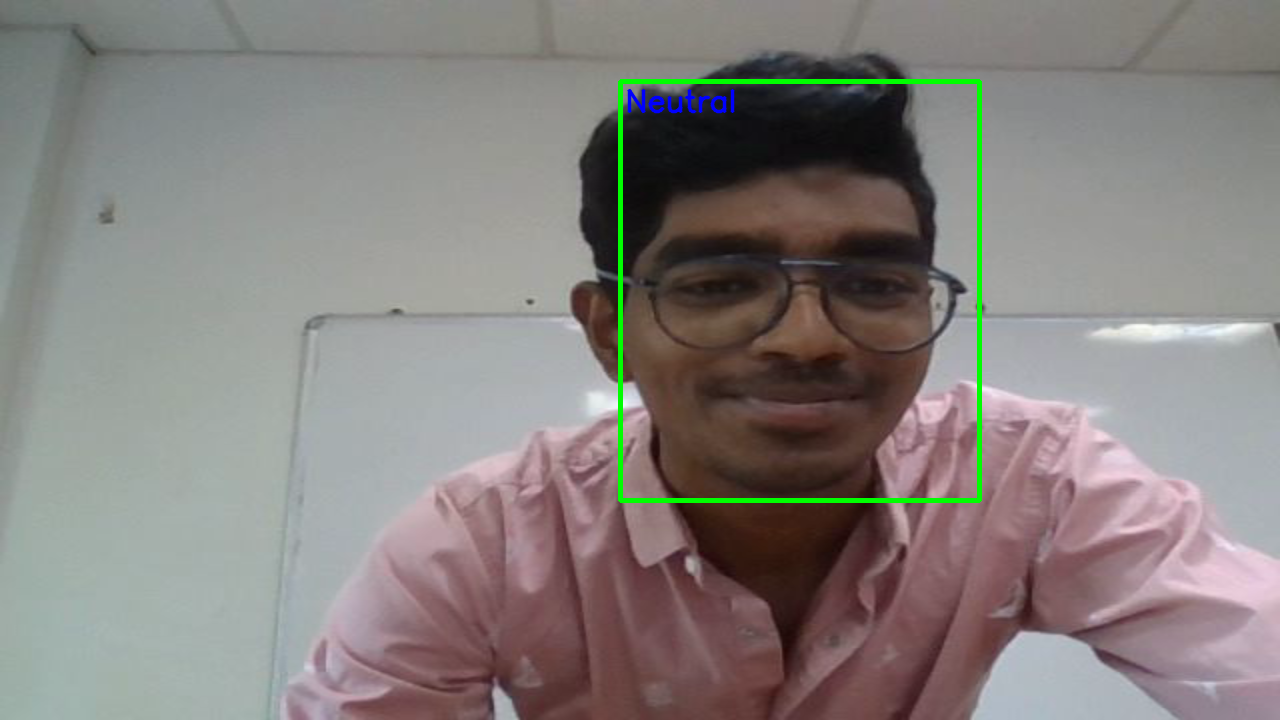

In [ ]:
#Testing
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from keras.models import model_from_json


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('/content/drive/MyDrive/model (1).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("/content/drive/MyDrive/model_weights.h5")
print("Loaded model from disk")


# start the webcam feed
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#Capture Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
except Exception as err:
  print(str(err))

#Processing Image
cap = cv2.VideoCapture("/content/photo.jpg")
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    try:
      frame = cv2.resize(frame, (1280, 720))
    except:
      break
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
